In [2]:
!ls

02-at-Preprocess-and-fit-model-aclImdb.ipynb
dataframe.ipynb
first_tweet.ipynb
format_csv.ipynb
images
Make_dataset_train_allocine.ipynb
Make_Dataset_twitter_predict.ipynb
Make_dataset_twitter_test.ipynb
naive_bayes_twitter.ipynb
Test_to_delete.ipynb
twitter_xlm_roberta_base_sentiment.ipynb


In [9]:
import sys

my_root = "/home/ezalos/42/42-AI/SentimentalBB"
import site
import sys

site.addsitedir(my_root)  # Always appends to end
print(sys.path)

from src.visualization.time.prepare_results import get_candidate_all_days_predictions


['/home/ezalos/42/42-AI/SentimentalBB/notebooks', '/home/ezalos/.vscode/extensions/ms-toolsai.jupyter-2022.3.1000901801/pythonFiles', '/home/ezalos/.vscode/extensions/ms-toolsai.jupyter-2022.3.1000901801/pythonFiles/lib/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/ezalos/.cache/pypoetry/virtualenvs/sentimentalbb-DXAKTikw-py3.8/lib/python3.8/site-packages', '/home/ezalos/.local/lib/python3.8/site-packages', '/home/ezalos/42/42-AI/Template_Lab', '/home/ezalos/42/42-AI/SentimentalBB/', '/home/ezalos/42/42-AI/SentimentalBB/']


ModuleNotFoundError: No module named 'src.visualization'

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


Generating figure...
Done !


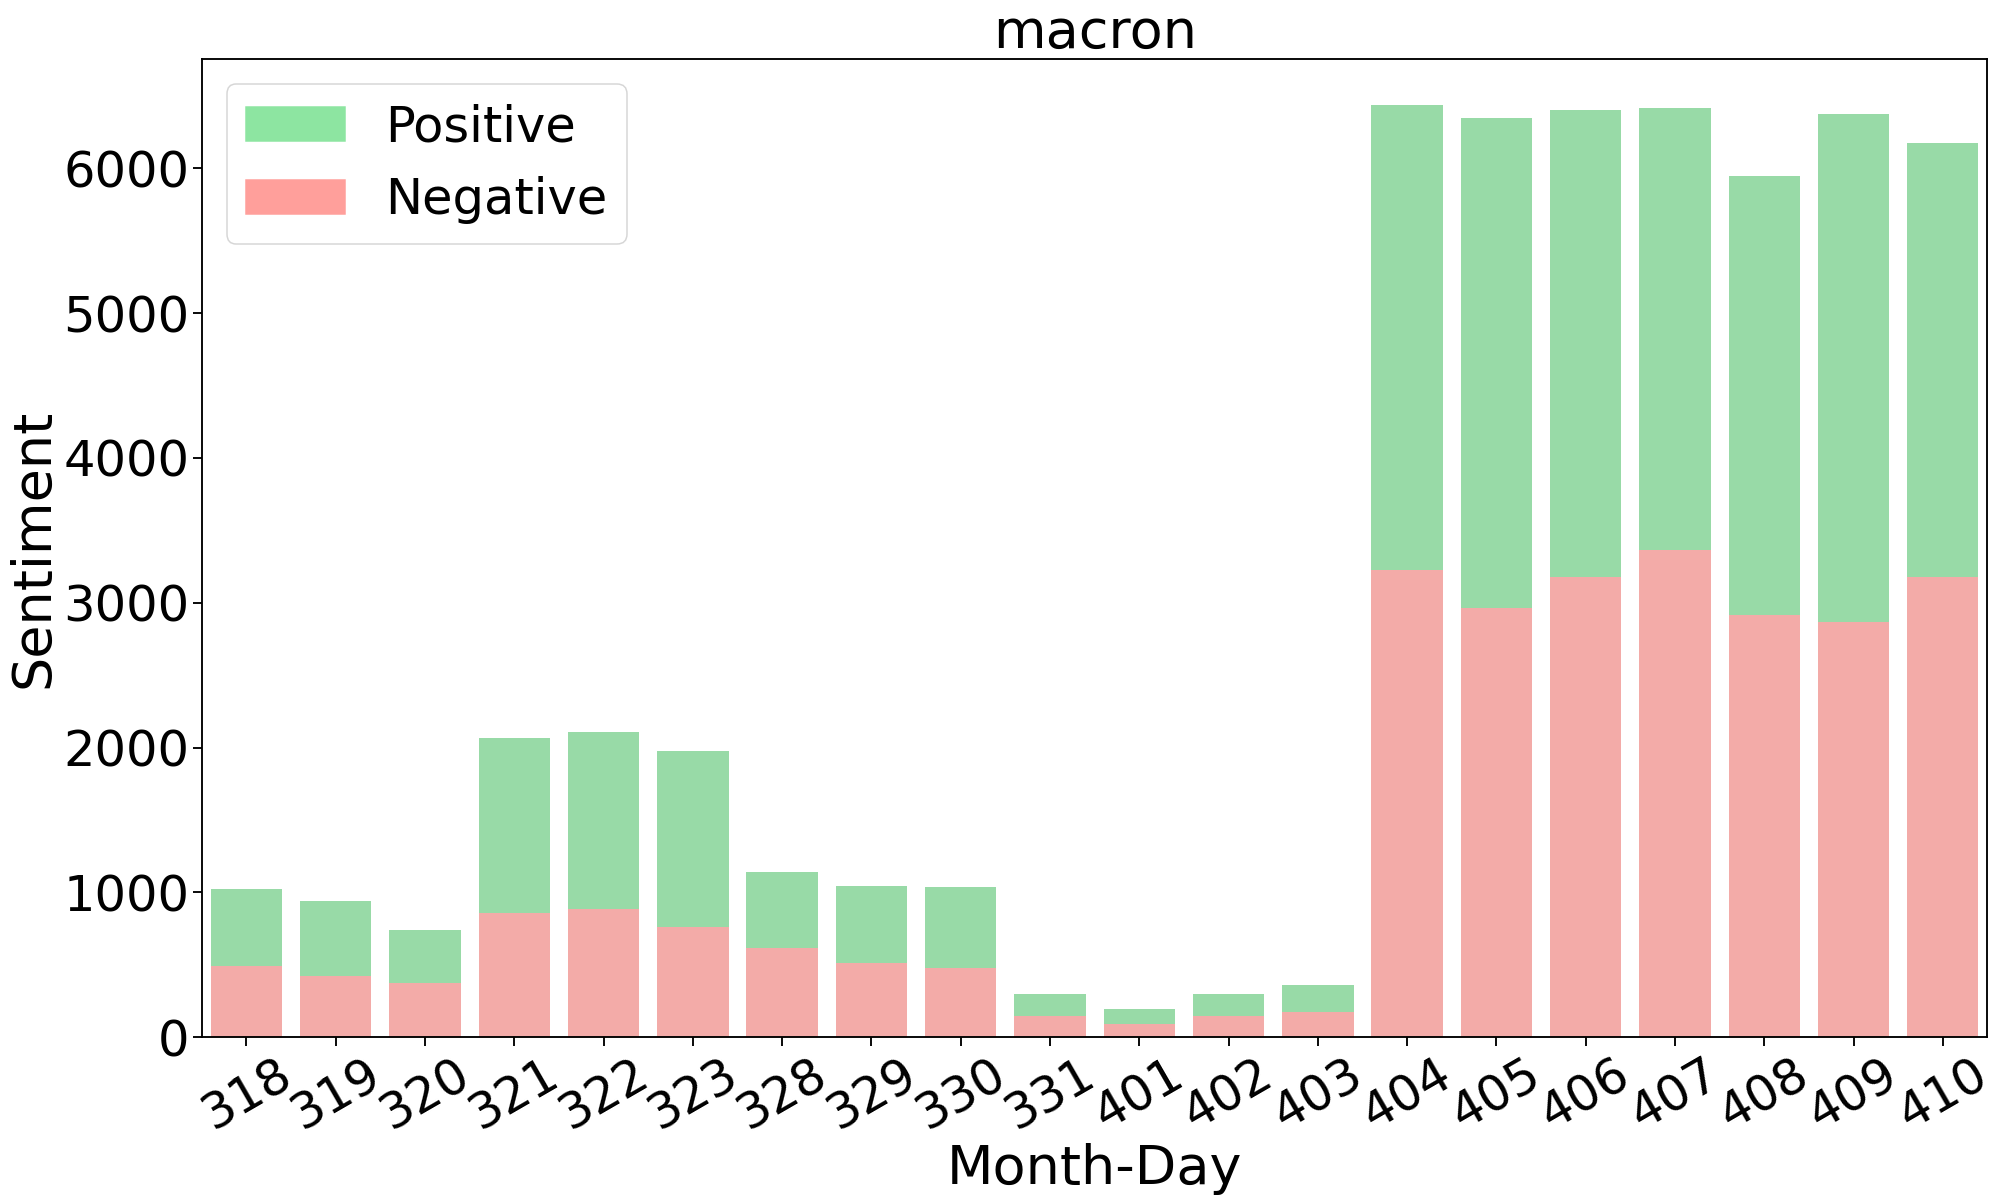

In [15]:
def make_time_bars_figure(ax, candidate, df, relative=True):  # load dataset
	c_pos = sns.color_palette("pastel")[2]
	c_net = sns.color_palette("pastel")[7]
	c_neg = sns.color_palette("pastel")[3]

	multi_plot = [
		{
			"column": "preds_total",
			"color": c_pos
		},
		{
			"column": "preds_not_positive",
			"color": c_net
		},
		{
			"column": "predict_Negative",
			"color": c_neg
		},
	]
	total_all = df.groupby('day')["preds_total"].sum().reset_index()

	for dic in multi_plot:
		column = dic["column"]
		color = dic["color"]
		total_1 = df.groupby('day')[column].sum().reset_index()
		# if relative:
		# 	total_1[column + "_percent"] = total_1[column] / total_all
		# 	column = column + "_percent"
		bar1 = sns.barplot(x="day",  y=column, data=total_1, color=color, ax=ax)
		bar1.set_xticklabels(bar1.get_xticklabels(), rotation=30)

	top_bar = mpatches.Patch(color=c_pos, label='Positive')
	# mid_bar = mpatches.Patch(color=c_net, label='Neutral')
	bot_bar = mpatches.Patch(color=c_neg, label='Negative')
	ax.legend(handles=[top_bar, bot_bar])

	ax.set_xlabel("Month-Day")
	ax.set_ylabel("Sentiment")
	ax.set_title(candidate)


def save_figure_candidate(candidate):
	df = pd.read_csv("macron.csv")

	print("Generating figure...")
	sns.set_context(context="talk", font_scale=3, rc=None)
	plt.figure(figsize=(16 * 2, 9 * 2))
	ax = plt.gca()
	make_time_bars_figure(ax, candidate, df)
	fig_path = f"./test.png"
	plt.savefig(fig_path)
	print("Done !")

save_figure_candidate("macron")

In [18]:

df = pd.read_csv("macron.csv")
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,candidate,time,tweet_id,text,predict_Positive,predict_Negative,predict_Neutral,day,preds_total,preds_not_positive
0,0,0,0,Macron,23:48:27,1509316657612742660,@Mandoline_Blue I really don't understand why ...,1.0,0.0,0.0,330,1.0,0.0
1,1,1,1,Macron,23:48:17,1509316615619366917,#saccagelaFrance et génocide le peuple françai...,1.0,0.0,0.0,330,1.0,0.0
2,2,2,2,Macron,23:46:44,1509316225347821571,@EmmanuelMacron Promouvoir la cessation; si le...,1.0,0.0,0.0,330,1.0,0.0
3,3,3,3,Macron,23:46:15,1509316104962908174,"@EmmanuelMacron Silence petit, laisse gérer le...",1.0,0.0,0.0,330,1.0,0.0
4,4,4,4,Macron,23:46:13,1509316094741389312,@AbiGailKitKat @MarkarianAlex17 @EmmanuelMacro...,0.0,1.0,0.0,330,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57303,353,353,353,Macron,19:59:03,1510708476552663065,@EmmanuelMacron Vous pensez toujours que seul ...,0.0,1.0,0.0,403,1.0,1.0
57304,354,354,354,Macron,19:59:01,1510708470269550596,@92enmarche @Emmanuel_CANTO_ @EmmanuelMacron @...,1.0,0.0,0.0,403,1.0,0.0
57305,355,355,355,Macron,19:59:01,1510708468759597057,@clr2ba @OrsucciJC @LMarcangeli @VilledAjaccio...,0.0,1.0,0.0,403,1.0,1.0
57306,356,356,356,Macron,19:59:00,1510708465404203013,@Maxou24_ @JohnnyC61867531 @PutainBlague @Emma...,0.0,1.0,0.0,403,1.0,1.0


In [3]:
total_all = df.groupby('day')["preds_total"].sum().reset_index()
total_all

,day,preds_total
0,318,1027.0
1,319,941.0
2,320,741.0
3,321,2063.0
4,322,2110.0
5,323,1979.0
6,328,1140.0
7,329,1042.0
8,330,1040.0
9,331,297.0


In [21]:
def get_pred_total_day(day, total_all):
	sub_df = total_all[(total_all["day"] == day)]
	val = sub_df['preds_total'].tolist()[0]
	return val

cdf = df["day", "preds_total", "preds_not_positive", "predict_Negative"]

total_all = cdf.groupby('day')["preds_total"].sum().reset_index()
cdf["total_day"] = cdf["day"].apply(lambda day: get_pred_total_day(day, total_all))
cdf

KeyError: ('preds_total', 'preds_not_positive', 'predict_Negative')

In [32]:
def get_pred_total_day(row):
	# print(row)
	r_d = row["day"]
	r_ta = total_all["day"]
	index_arr = (r_ta == r_d)
	sub_df = total_all[index_arr]
	col = sub_df['preds_total']
	return col

df['pred_total_day'] = df.apply(get_pred_total_day, axis=0)

0          0
1          1
2          2
3          3
4          4
        ... 
57303    353
57304    354
57305    355
57306    356
57307    357
Name: Unnamed: 0.2, Length: 57308, dtype: int64


KeyError: 'day'